In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/mac/Downloads/Housing_dataset_train(in).csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [4]:
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [5]:
#checking for nulls values
data.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [6]:
#dealing with null values in categorical columns
for col in ['loc', 'title']:
    col_mode = data[col].mode()[0]
    data[col].fillna(col_mode, inplace = True)

In [7]:
#dealing with null values in numerical columns
for col in ['bedroom', 'bathroom', 'parking_space']:
    col_median = data[col].median()
    data[col].fillna(col_median, inplace = True)

In [8]:
data.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

## Exploratory Data Analysis (EDA)

In [10]:
data.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,14000.000000,14000.000000,14000.000000,1.400000e+04
mean,4862.700357,4.268571,2.988000,3.147857,2.138082e+06
std,3818.348214,2.281249,1.937814,1.493466,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,3.000000,2.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,4.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


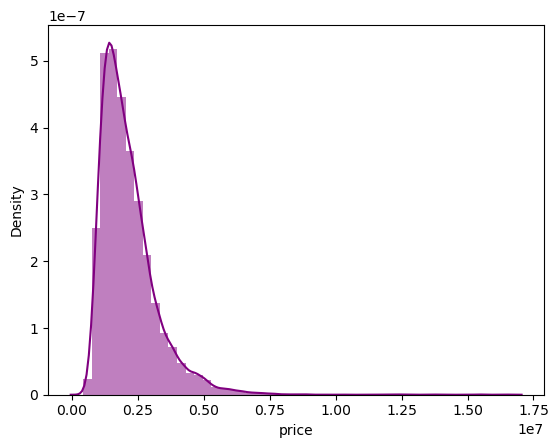

In [11]:
sns.distplot(data['price'],bins=50, color='purple', hist_kws={'alpha': 0.5})
plt.show()

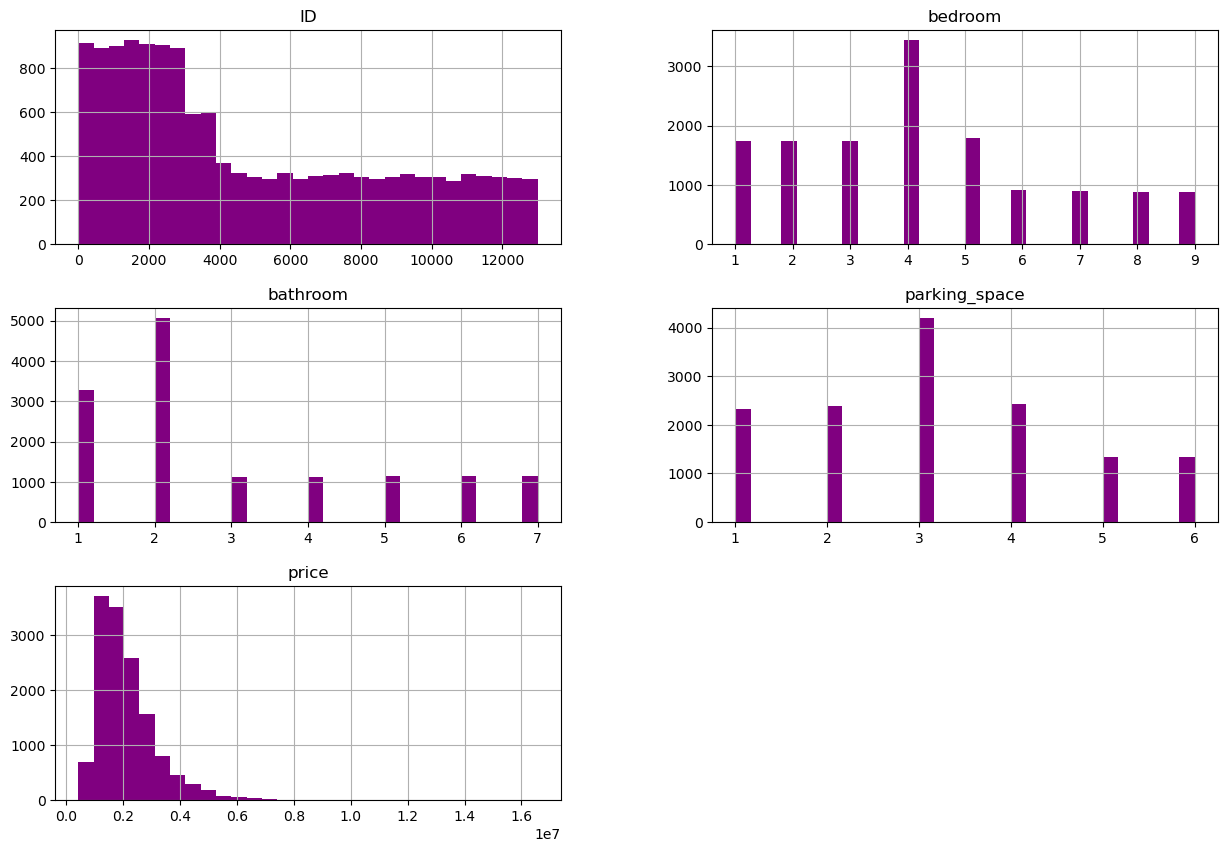

In [12]:
num_data= data.select_dtypes(include = ['int64', 'float'])
num_data.hist(bins=30, figsize=(15, 10), color = "purple")
plt.show()

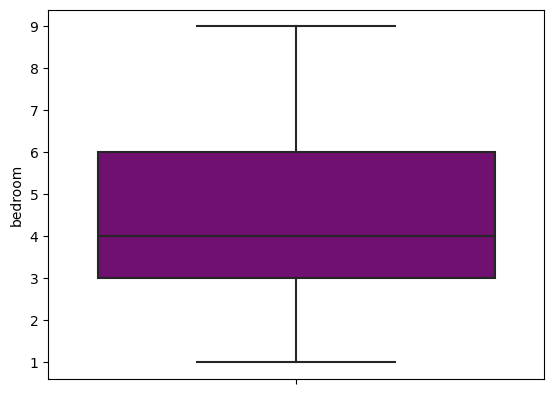

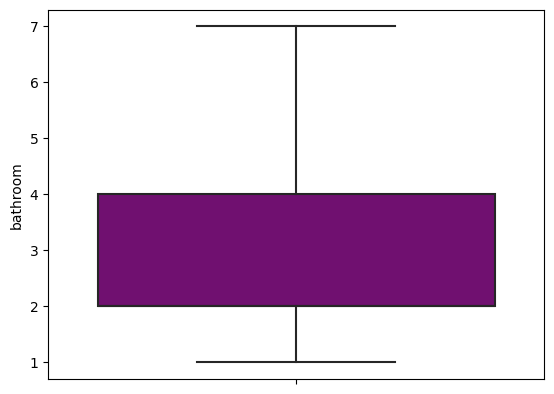

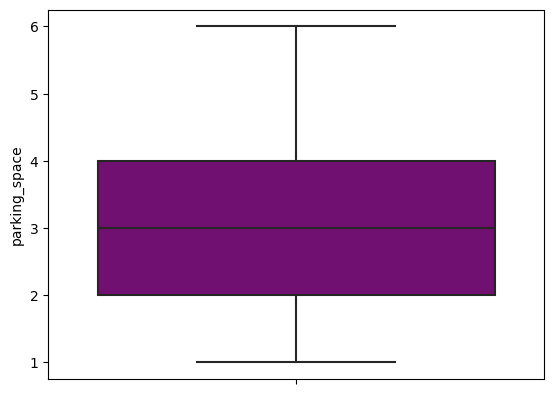

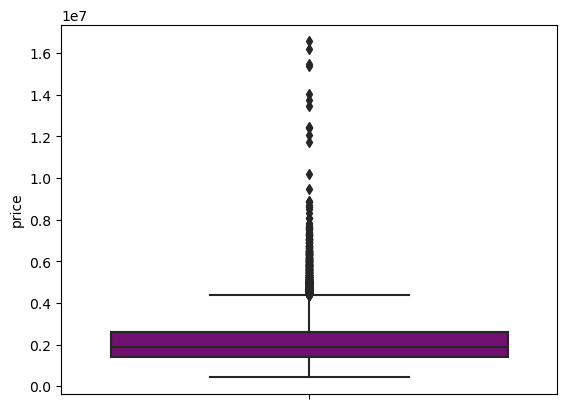

In [13]:
#checking for otliers
for col in ['bedroom', 'bathroom', 'parking_space', 'price']:
    sns.boxplot(y=data[col], color = 'purple')
    plt.show()

In [14]:
#dealing with the outliers in price column
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

find_outliers(data, 'price')

,ID,loc,title,bedroom,bathroom,parking_space,price
35,11872,Edo,Mansion,5.0,6.0,3.0,4596234.296
82,2089,Kaduna,Mansion,9.0,2.0,3.0,4694243.682
90,1616,Rivers,Mansion,3.0,1.0,4.0,5790058.642
164,8523,Anambra,Mansion,6.0,3.0,5.0,4623665.195
165,2405,Kaduna,Mansion,7.0,4.0,3.0,4963897.057
...,...,...,...,...,...,...,...
13900,1694,Lagos,Detached duplex,2.0,2.0,3.0,4887403.866
13903,11733,Cross River,Mansion,7.0,6.0,3.0,5463611.003
13928,12532,Anambra,Mansion,5.0,6.0,5.0,4534423.081
13956,9054,Ogun,Mansion,8.0,1.0,2.0,5419771.173


In [15]:
#capping them
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df

data_capped = cap_outliers(data, 'price')

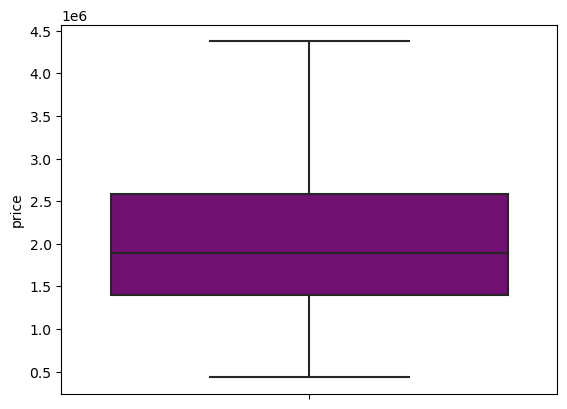

In [16]:
sns.boxplot(y=data_capped['price'], color = 'purple')
plt.show()

In [17]:
label_encoders = {}
for column in ['loc', 'title']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

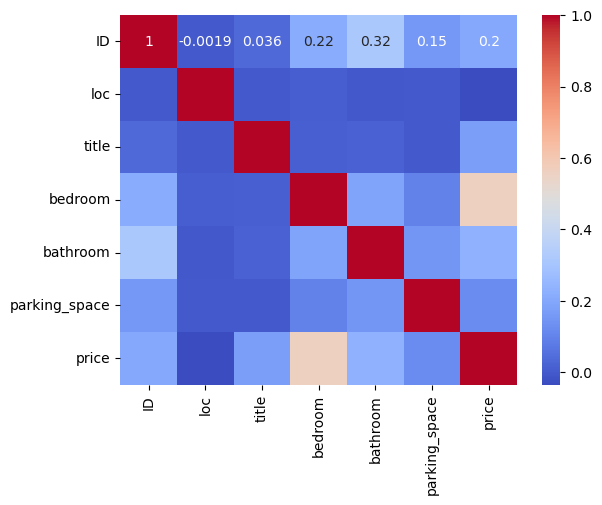

In [18]:
corr_matrix = data_capped.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
X= data_capped.drop(columns = ['ID', 'price'])
y = data_capped['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lin_reg.predict(X_test)
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression:
MAE: 550389.889124889
MSE: 546300489406.94073
R2 Score: 0.3575255209715835


In [23]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
MAE: 322223.4647501059
MSE: 251285127357.6884
R2 Score: 0.7044771432257315


In [25]:
def train(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'MAE': mae,
            'MSE': mse,
            'R2': r2
        }
        
        print(f"{name}:")
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"R2 Score: {r2}")
        print("-" * 30)
    
    return results

In [26]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

In [27]:
results = train(models, X_train, y_train, X_test, y_test)

Linear Regression:
MAE: 550389.889124889
MSE: 546300489406.94073
R2 Score: 0.3575255209715835
------------------------------
Decision Tree:
MAE: 385478.17083442316
MSE: 390278239044.8129
R2 Score: 0.5410148568992691
------------------------------
Random Forest:
MAE: 322223.4647501059
MSE: 251285127357.6884
R2 Score: 0.7044771432257315
------------------------------
Gradient Boosting:
MAE: 312294.4212642413
MSE: 212917508816.49124
R2 Score: 0.7495992256909636
------------------------------


In [28]:
gb_model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

y_pred = best_gb_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Mean Absolute Error (MAE): 254858.69442328444
Mean Squared Error (MSE): 177343509949.7044
R-squared (R²): 0.7914358830472621


In [29]:
gb_model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

y_pred = best_gb_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Mean Absolute Error (MAE): 254858.6944232845
Mean Squared Error (MSE): 177343509949.7044
R-squared (R²): 0.7914358830472621


In [30]:
#retraining with all the train data and the best hyperparameters
best_model_all = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3
)

best_model_all.fit(X, y)

GradientBoostingRegressor(n_estimators=500)

In [31]:
test_data = pd.read_csv('/Users/mac/Downloads/Housing_dataset_test(in).csv')

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [33]:
test_data.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [34]:
label_encoders = {}
for column in ['loc', 'title']:
    label_encoders[column] = LabelEncoder()
    test_data[column] = label_encoders[column].fit_transform(test_data[column])

In [35]:
new_data=test_data.drop(columns = ['ID'])

In [36]:
predictions = best_model_all.predict(new_data)

In [37]:
predicted_data = pd.DataFrame({'ID': test_data['ID'], 'predicted_price' : predictions})

In [38]:
predicted_data.head()

,ID,predicted_price
0,845,2.335419e+06
1,1924,1.019520e+06
2,10718,1.141240e+06
3,12076,5.659624e+06
4,12254,1.955578e+06


In [39]:
predicted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6000 non-null   int64  
 1   predicted_price  6000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 93.9 KB
